In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import gzip
import urllib.request
from requests import get
from datetime import datetime
from IPython.display import display, HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def unzip(out_file):
    try:
        print('Descompactando arquivo',out_file)
        with gzip.GzipFile(out_file,'rb') as uncompressed:
            file_content = uncompressed.read()
        with open(out_file, 'wb') as f:
            f.write(file_content)
            return 0

    except Exception as e:
        print(e)
        return 1

def download(url, file_name):
    try:
        with open(file_name, "wb") as file:
            response = get(url)
            file.write(response.content)
        print('Download file',file_name)            
        return 0
    except Exception as e:
        print(e)
        return 1


cvs = glob.glob('*.cvs')
print('Tentando remover arquivos antigos')
for i in cvs:
    print('Removendo arquivos antigos')
    os.remove(i)
    
download('https://data.brasil.io/dataset/covid19/caso_full.csv.gz','caso_full.csv.gz')
unzip('caso_full.csv.gz')
download('https://brasil.io/dataset/covid19/caso/?is_last=True&place_type=city&state=PE&format=csv','pernambuco.csv')
download('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv','cases-brazil-cities-time.csv')
download('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv','cases-brazil-states.csv')
download('https://brasil.io/dataset/covid19/caso_full/?format=csv','brasil.csv')

now = datetime.now() 
print(now)
print(os.listdir('.'))

diretorio='files'
if not os.path.exists(diretorio):
    os.makedirs(diretorio)
    print("Pasta",diretorio,"criada ")
else:    
    print("Pasta",diretorio,"já existe")    

  


Tentando remover arquivos antigos
Download file caso_full.csv.gz
Descompactando arquivo caso_full.csv.gz
Download file pernambuco.csv
Download file cases-brazil-cities-time.csv
Download file cases-brazil-states.csv
('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))
2020-07-02 15:02:32.032266
['.config', 'cases-brazil-cities-time.csv', 'pernambuco.csv', 'caso_full.csv.gz', 'cases-brazil-states.csv', 'brasil.csv', 'sample_data']
Pasta files criada 


In [3]:
df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
display(df_municipio.tail())

,epi_week,date,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
292237,27,2020-07-01,Brazil,PR,Ângulo/PR,4101150,41015.0,15ª RS Maringá,0,0,0,1,0.00000,34.15301,0.00000,SES
292238,27,2020-07-01,Brazil,BA,Érico Cardoso/BA,2900504,29003.0,Brumado,0,0,0,0,0.00000,0.00000,0.00000,SES
292239,27,2020-07-01,Brazil,PA,Óbidos/PA,1505106,15002.0,Baixo Amazonas,3,8,16,267,15.34419,512.11232,0.02996,SES
292240,27,2020-07-01,Brazil,SP,Óleo/SP,3533809,35094.0,Ourinhos,0,0,0,1,0.00000,40.06410,0.00000,SES
292241,27,2020-07-01,Brazil,TOTAL,TOTAL,0,NaN,NaN,1020,60807,44559,1457158,28.93544,693.39897,0.04173,NaN


In [4]:
df_estado = pd.read_csv('cases-brazil-states.csv')
display(df_estado.tail())

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
3117,27,2020-07-01,Brazil,SC,TOTAL,6,347,925,27279,347,27279,4.84313,380.73702,0.01272,21402.0,5933.0,103101.0,1438.99582
3118,27,2020-07-01,Brazil,SE,TOTAL,26,702,504,25915,701,25915,30.53905,1127.37830,0.02709,14878.0,8695.0,51121.0,2223.91304
3119,27,2020-07-01,Brazil,SP,TOTAL,267,15030,8555,289935,15030,289935,32.73151,631.40463,0.05184,157845.0,263250.0,602384.0,1311.83901
3120,27,2020-07-01,Brazil,TO,TOTAL,0,204,0,11222,204,11222,12.96995,713.47464,0.01818,7118.0,2242.0,21302.0,1354.34296
3121,27,2020-07-01,Brazil,TOTAL,TOTAL,1020,60807,44559,1457158,60632,1448753,28.93544,693.39897,0.04173,926192.0,747616.0,3504141.0,1667.47035


In [5]:
#Selecionando total de mortes no estado de Pernambuco
df_estado_pernambuco = df_estado[ ['date','state', 'deaths']]
df_estado_pernambuco = df_estado_pernambuco.loc[ (df_estado_pernambuco["state"]=="PE") & (df_estado_pernambuco["deaths"]>0) & (df_estado_pernambuco["date"] >= "2020-06-01") ]
df_estado_pernambuco.head()


,date,state,deaths
2269,2020-06-01,PE,2875
2297,2020-06-02,PE,2933
2325,2020-06-03,PE,3012
2353,2020-06-04,PE,3134
2381,2020-06-05,PE,3205


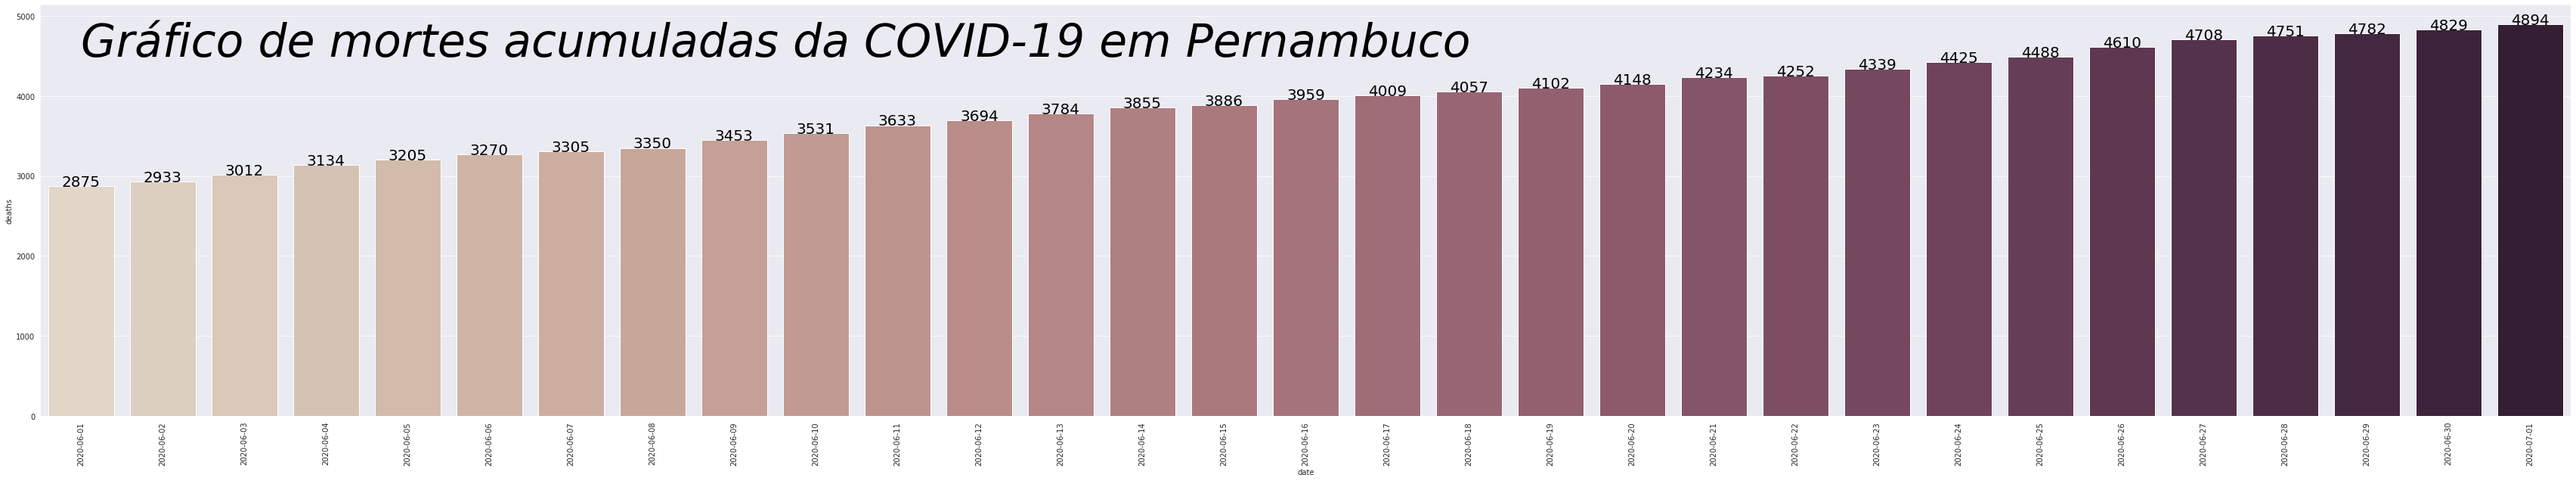

In [6]:

sns.set_style('darkgrid')
plt.figure(figsize=(60,10))
g = sns.barplot(data=df_estado_pernambuco, x='date',y='deaths',palette="ch:.25")
plt.xticks(rotation=90)
plt.text(0,4500, "Gráfico de mortes acumuladas da COVID-19 em Pernambuco", fontsize = 60, color='Black', fontstyle='italic')

cont=0
for index, row in df_estado_pernambuco.iterrows():
  g.text(cont,row.deaths, row.deaths, color='black', ha="center",fontsize=20)
  cont = cont+1

g.figure.savefig('files/novos_mortes_pernambuco_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/novos_mortes_pernambuco_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


In [7]:
#Selecionando total de mortes por dia no estado de Pernambuco
df_estado_pernambuco = df_estado[ ['date','state', 'newDeaths']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE") & (df_estado_pernambuco["newDeaths"]>0)]
df_estado_pernambuco.tail()

,date,state,newDeaths
2997,2020-06-27,PE,98
3025,2020-06-28,PE,43
3053,2020-06-29,PE,31
3081,2020-06-30,PE,47
3109,2020-07-01,PE,65


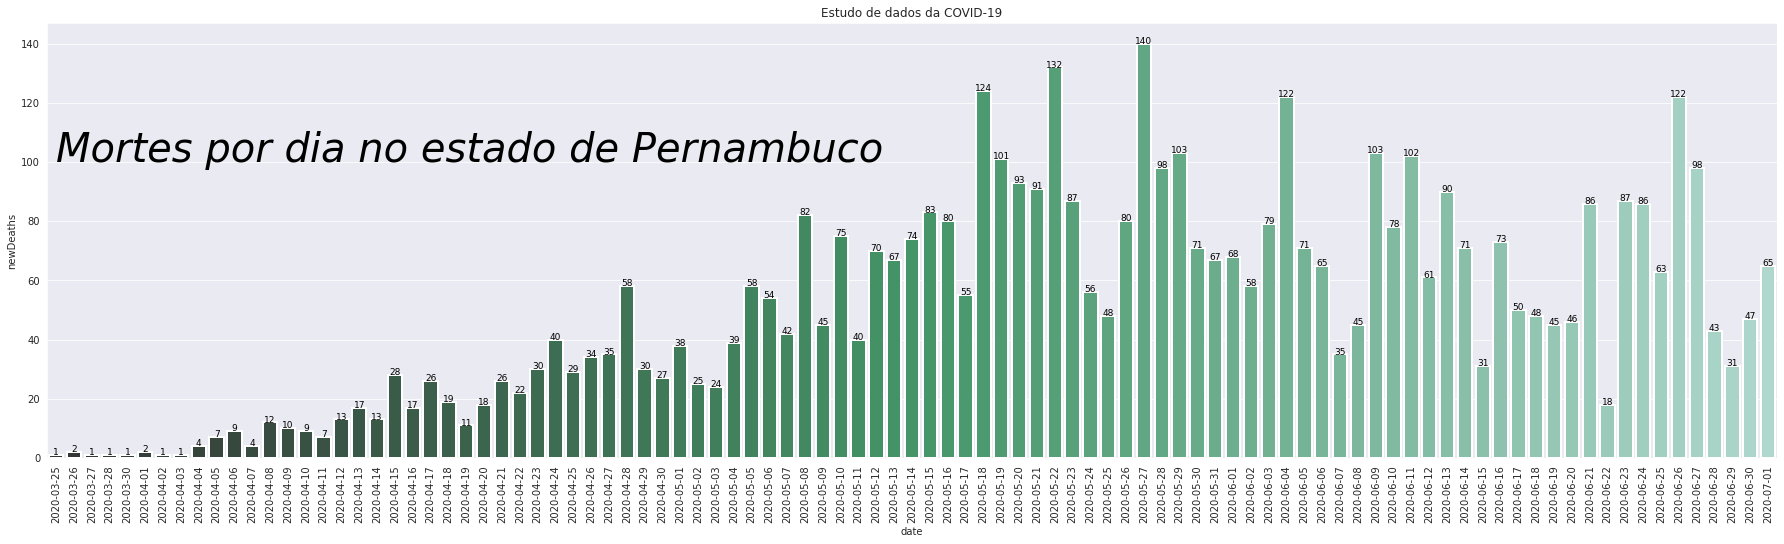

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_estado_pernambuco, x='date',y='newDeaths',palette="BuGn_d",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,100, "Mortes por dia no estado de Pernambuco", fontsize = 40, color='Black', fontstyle='italic')

cont=0
for index, row in df_estado_pernambuco.iterrows():
  g.text(cont,row.newDeaths, row.newDeaths, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_mortes_pernambuco_por_dia.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/novos_mortes_pernambuco_por_dia.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


Text(0.5, 1.0, 'Mortes por dia no estado de Pernambuco')

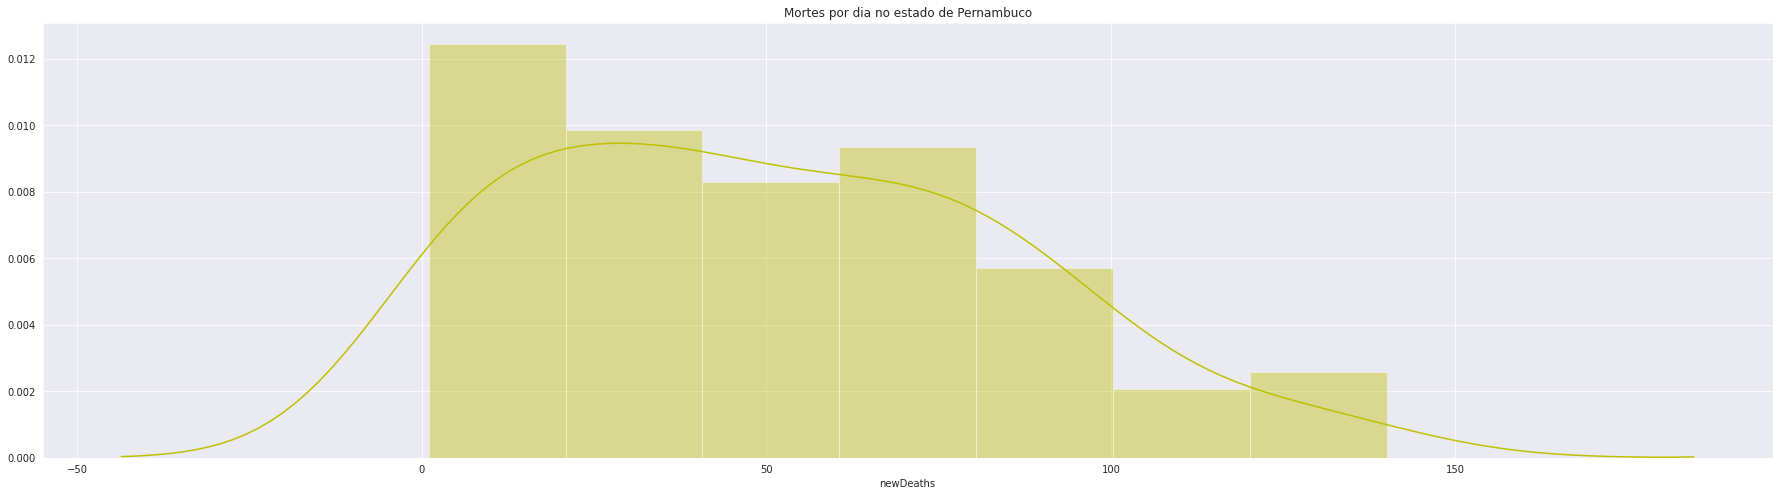

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
sns.distplot(df_estado_pernambuco['newDeaths'],color="y")
plt.title('Mortes por dia no estado de Pernambuco') 

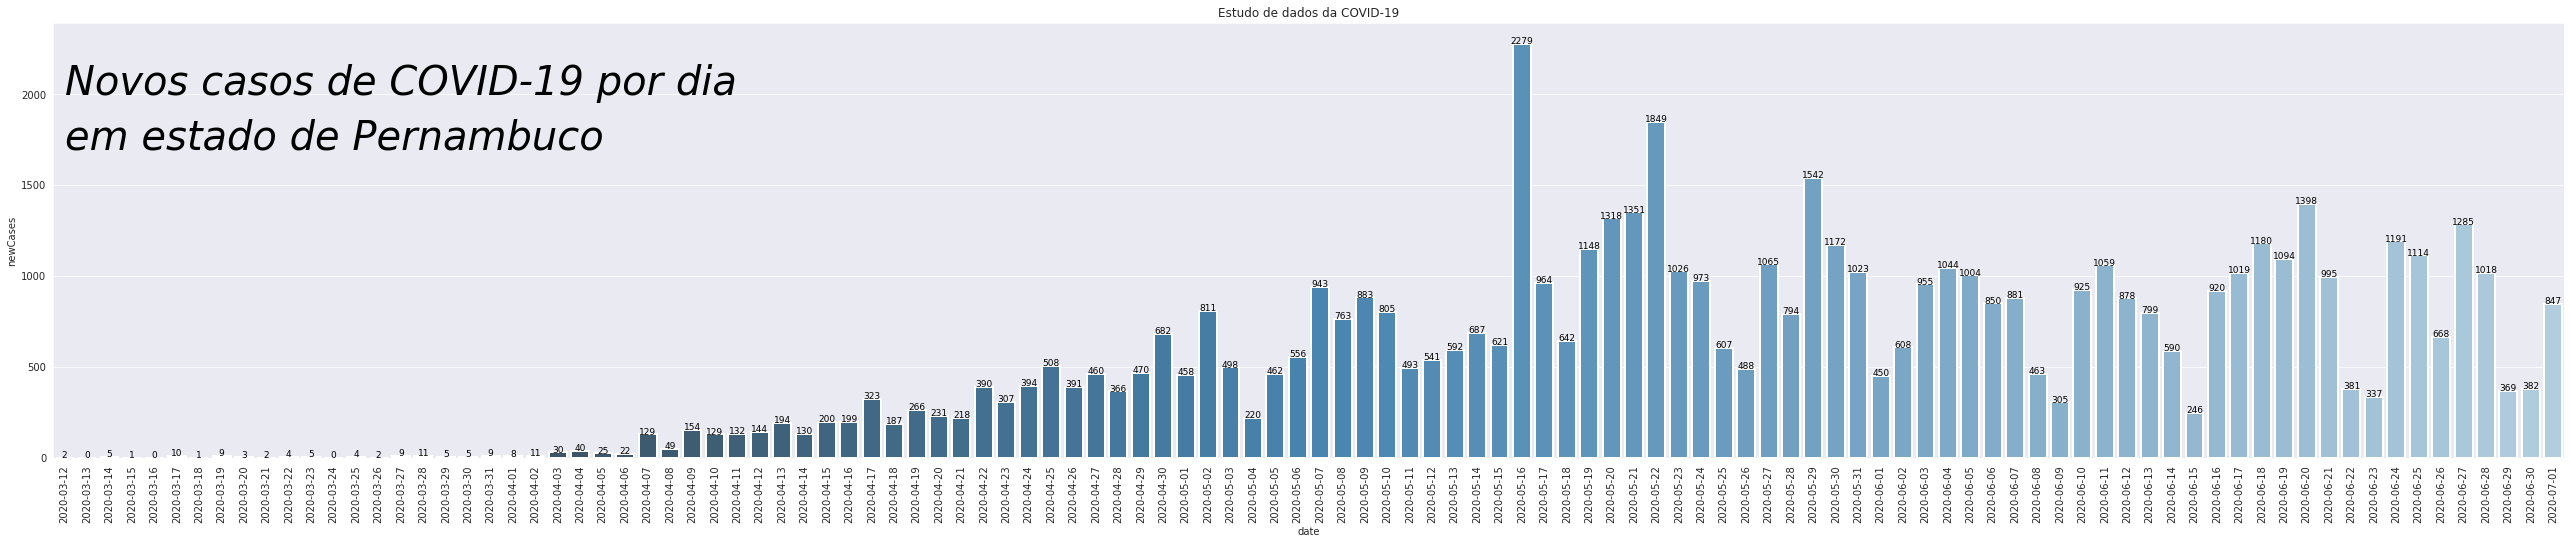

In [22]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

sns.set_style('darkgrid')
plt.figure(figsize=(45,8))
g = sns.barplot(data=df_estado_pernambuco, x='date',y='newCases',palette="Blues_d",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,2000, "Novos casos de COVID-19 por dia", fontsize = 40, color='Black', fontstyle='italic')
plt.text(0,1700, "em estado de Pernambuco", fontsize = 40, color='Black', fontstyle='italic')

cont=0
for index, row in df_estado_pernambuco.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_pernambuco_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/novos_casos_pernambuco_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,date,state,city,newCases
269725,2020-06-27,PE,Paulista/PE,30
274882,2020-06-28,PE,Paulista/PE,25
280052,2020-06-29,PE,Paulista/PE,7
285241,2020-06-30,PE,Paulista/PE,11
290442,2020-07-01,PE,Paulista/PE,0


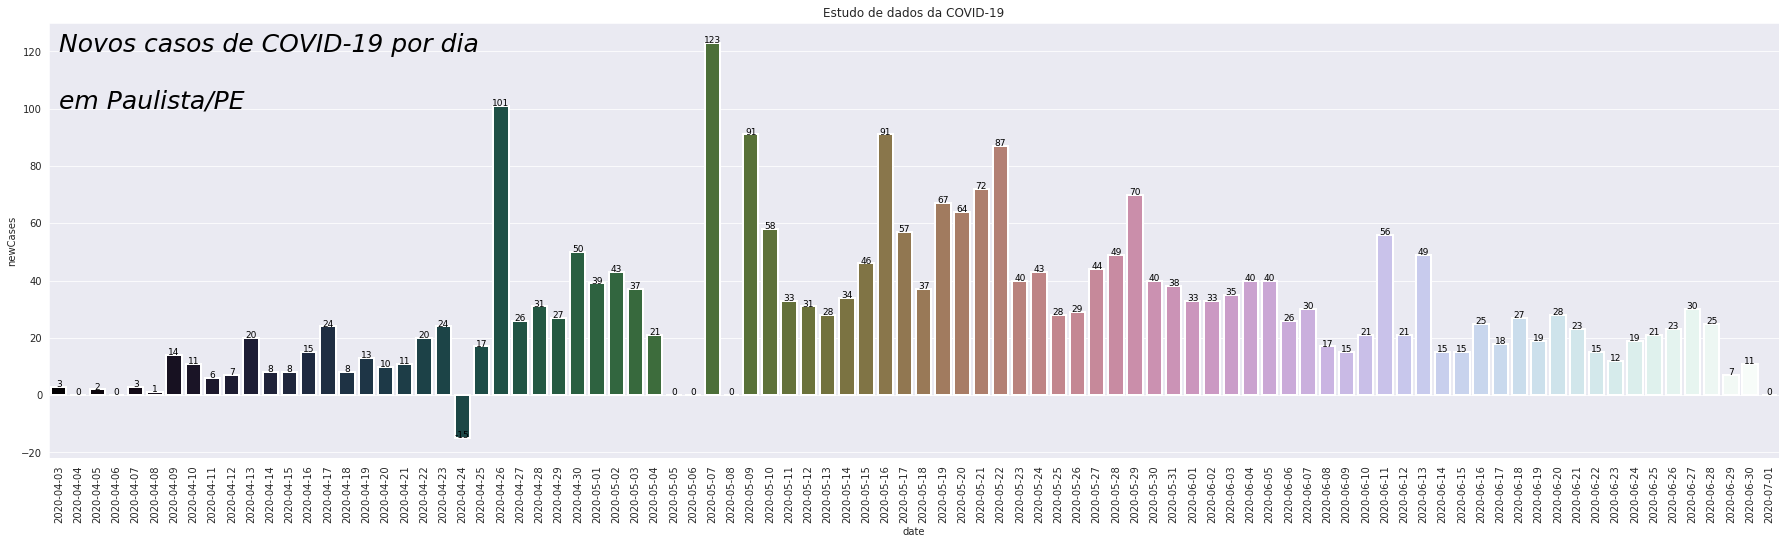

In [11]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado
df_paulista = df_paulista.loc[(df_paulista["state"]=="PE")]
# Selecionando municipio de Paulista
df_paulista = df_paulista.loc[(df_paulista["city"]=="Paulista/PE")]


display(df_paulista.tail())

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_paulista, x='date',y='newCases',palette="cubehelix",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,120, "Novos casos de COVID-19 por dia", fontsize = 25, color='Black', fontstyle='italic')
plt.text(0,100, "em Paulista/PE", fontsize = 25, color='Black', fontstyle='italic')

cont=0
for index, row in df_paulista.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_paulista_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/novos_casos_paulista_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,date,state,city,newCases
270130,2020-06-27,PE,Recife/PE,166
275288,2020-06-28,PE,Recife/PE,137
280459,2020-06-29,PE,Recife/PE,78
285649,2020-06-30,PE,Recife/PE,73
290850,2020-07-01,PE,Recife/PE,0


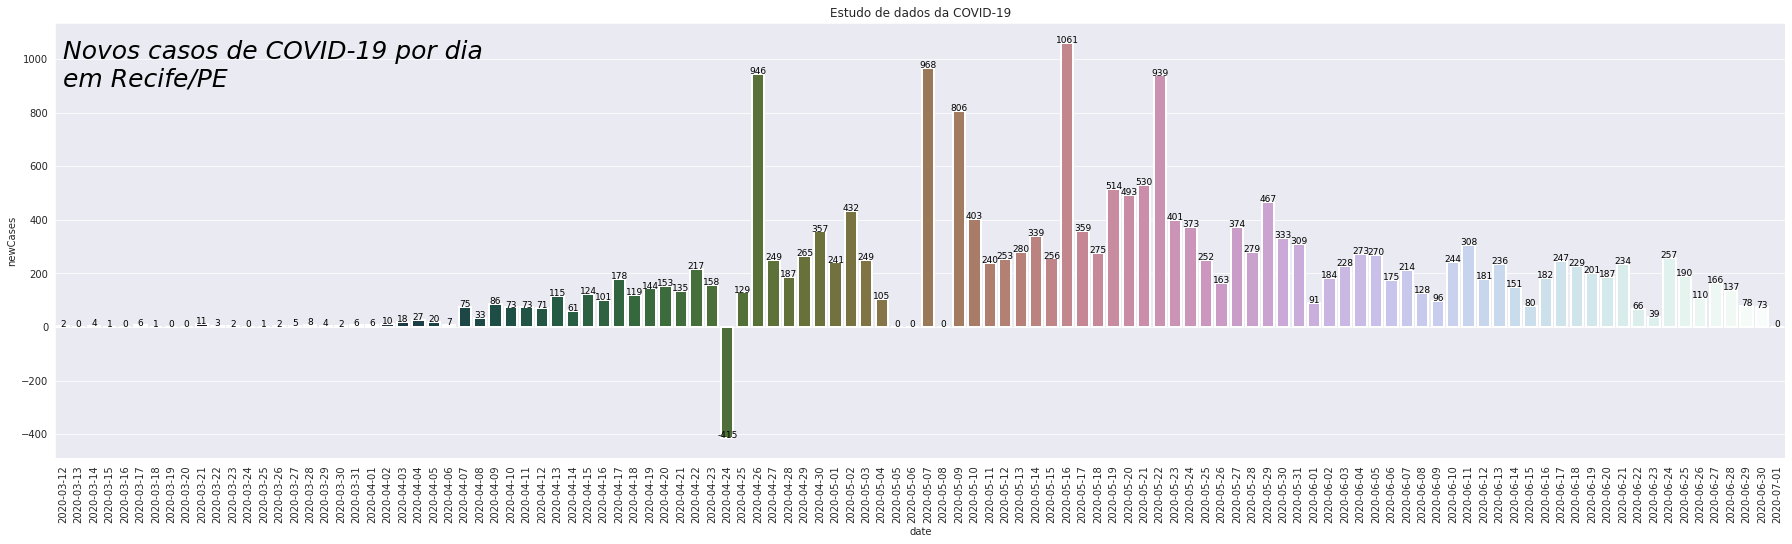

In [12]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado
df_paulista = df_paulista.loc[(df_paulista["state"]=="PE")]
# Selecionando municipio de Recife
df_paulista = df_paulista.loc[(df_paulista["city"]=="Recife/PE")]


display(df_paulista.tail())

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_paulista, x='date',y='newCases',palette="cubehelix",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,1000, "Novos casos de COVID-19 por dia", fontsize = 25, color='Black', fontstyle='italic')
plt.text(0,900, "em Recife/PE", fontsize = 25, color='Black', fontstyle='italic')

cont=0
for index, row in df_paulista.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_recife_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/novos_casos_recife_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,date,state,city,newCases
269519,2020-06-27,PE,Olinda/PE,93
274676,2020-06-28,PE,Olinda/PE,38
279845,2020-06-29,PE,Olinda/PE,7
285031,2020-06-30,PE,Olinda/PE,12
290232,2020-07-01,PE,Olinda/PE,0


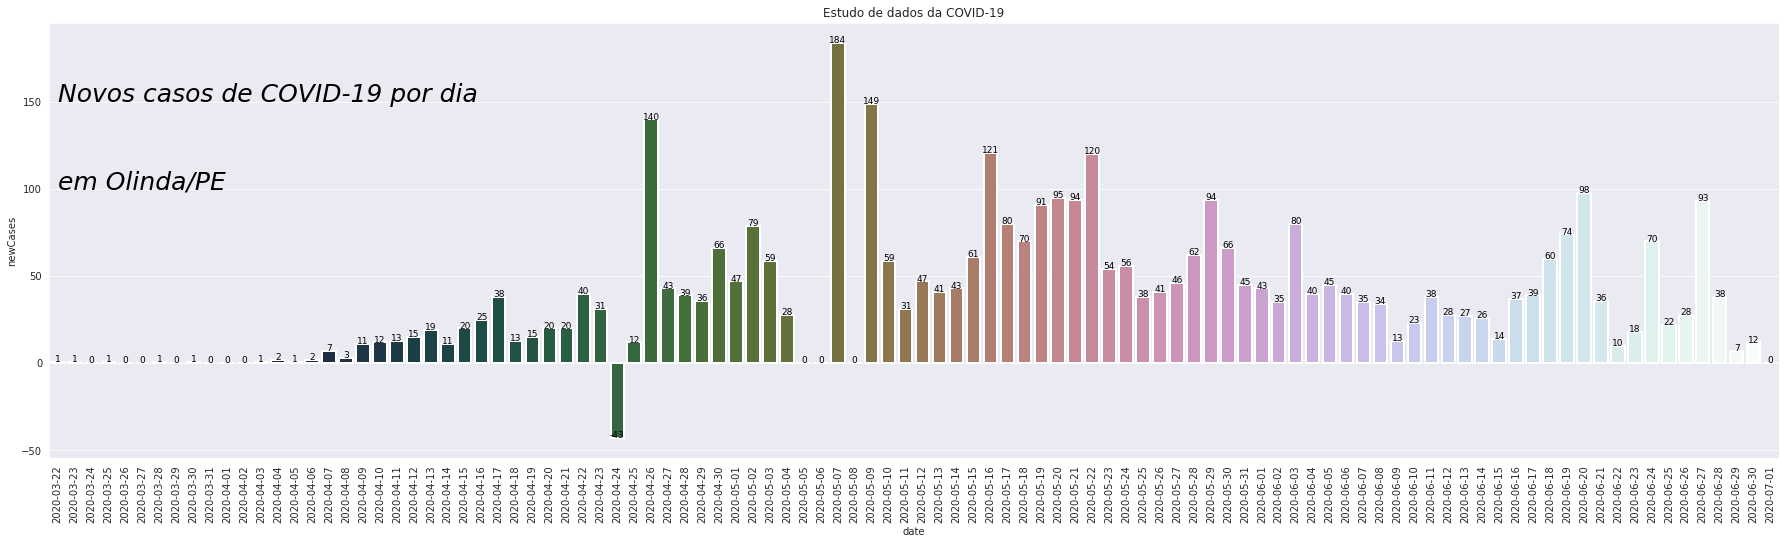

In [13]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
df_estado_pernambuco = df_estado[ ['date','state', 'newCases']]
df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
df_estado_pernambuco.tail()

df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado
df_paulista = df_paulista.loc[(df_paulista["state"]=="PE")]
# Selecionando municipio de Olinda
df_paulista = df_paulista.loc[(df_paulista["city"]=="Olinda/PE")]


display(df_paulista.tail())

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(data=df_paulista, x='date',y='newCases',palette="cubehelix",linewidth=2)
plt.xticks(rotation=90)
plt.title('Estudo de dados da COVID-19') 
plt.text(0,150, "Novos casos de COVID-19 por dia", fontsize = 25, color='Black', fontstyle='italic')
plt.text(0,100, "em Olinda/PE", fontsize = 25, color='Black', fontstyle='italic')

cont=0
for index, row in df_paulista.iterrows():
  g.text(cont,row.newCases, row.newCases, color='black', ha="center",fontsize=9)
  cont = cont+1

g.figure.savefig('files/novos_casos_olinda_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/novos_casos_olinda_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


2242
87


,month,deaths,cases
0,Mar,6,87
1,Apr,559,6789
2,May,2242,27574
3,Jun,2022,24408


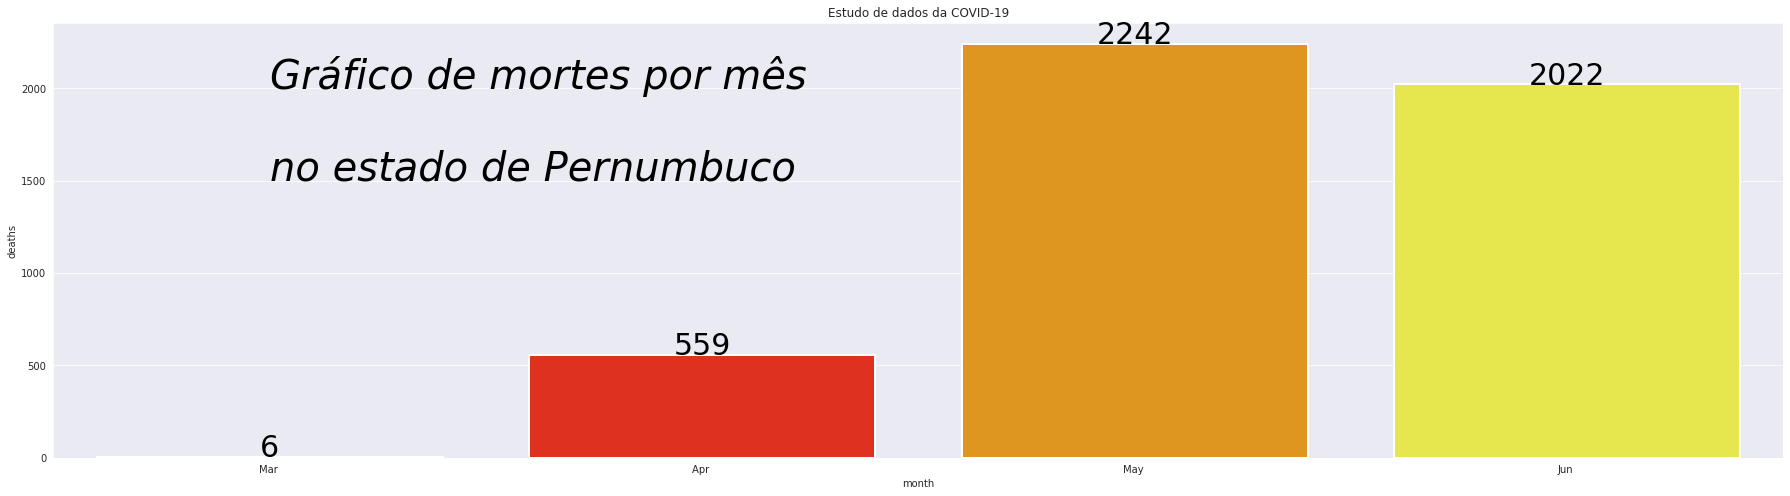

In [19]:
#Selecionando total de mortes no estado de Pernambuco
#print(df_estado.columns.values)
#df_estado_pernambuco = df_estado[ ['date','state', 'deaths']]
#df_estado_pernambuco = df_estado_pernambuco.loc[(df_estado_pernambuco["state"]=="PE")]
#df_estado_pernambuco.tail()

# Carregando dataframe
df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
#display(df_municipio.tail())

# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newDeaths']]
# Selecionando estado e datas
df_paulista_deaths_03 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-03-01") & (df_paulista["date"] <= "2020-03-31") ]
df_paulista_deaths_04 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-04-01") & (df_paulista["date"] <= "2020-04-31") ]
df_paulista_deaths_05 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-05-01") & (df_paulista["date"] <= "2020-05-31") ]
df_paulista_deaths_06 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-06-01") & (df_paulista["date"] <= "2020-06-31") ]

# Selecionando as colunas desejadas
df_paulista = df_municipio[ ['date','state','city','newCases']]
# Selecionando estado e datas
df_paulista_totalCases_03 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-03-01") & (df_paulista["date"] <= "2020-03-31") ]
df_paulista_totalCases_04 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-04-01") & (df_paulista["date"] <= "2020-04-31") ]
df_paulista_totalCases_05 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-05-01") & (df_paulista["date"] <= "2020-05-31") ]
df_paulista_totalCases_06 = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-06-01") & (df_paulista["date"] <= "2020-06-31") ]

# Número de mortes por mês
sum_row = df_paulista_deaths_05.sum(axis=0)
print(sum_row.newDeaths)

# Número de casos por mês
sum_row = df_paulista_totalCases_03.sum(axis=0)
print(sum_row.newCases)


data = {'month': ['Mar ','Apr ','May ','Jun '],
        'deaths': [
                   df_paulista_deaths_03.sum(axis=0).newDeaths,
                   df_paulista_deaths_04.sum(axis=0).newDeaths,
                   df_paulista_deaths_05.sum(axis=0).newDeaths,
                   df_paulista_deaths_06.sum(axis=0).newDeaths,
                   ],
        'cases': [
                  df_paulista_totalCases_03.sum(axis=0).newCases,
                  df_paulista_totalCases_04.sum(axis=0).newCases,
                  df_paulista_totalCases_05.sum(axis=0).newCases,
                  df_paulista_totalCases_06.sum(axis=0).newCases,
                  ]
        }

df = pd.DataFrame(data)
display(df)

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(x="month", y="deaths", data=df,palette="hot",linewidth=2);
plt.title('Estudo de dados da COVID-19') 
plt.text(0,2000, "Gráfico de mortes por mês", fontsize = 40, color='Black', fontstyle='italic')
plt.text(0,1500, "no estado de Pernumbuco", fontsize = 40, color='Black', fontstyle='italic')


cont=0
for index, row in df.iterrows():
  g.text(cont,row.deaths, row.deaths, color='black', ha="center",fontsize=30)
  cont = cont+1

g.figure.savefig('files/mortes_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/mortes_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


,month,deaths,cases
0,Mar,6,87
1,Apr,559,6789
2,May,2242,27574
3,Jun,2022,24408


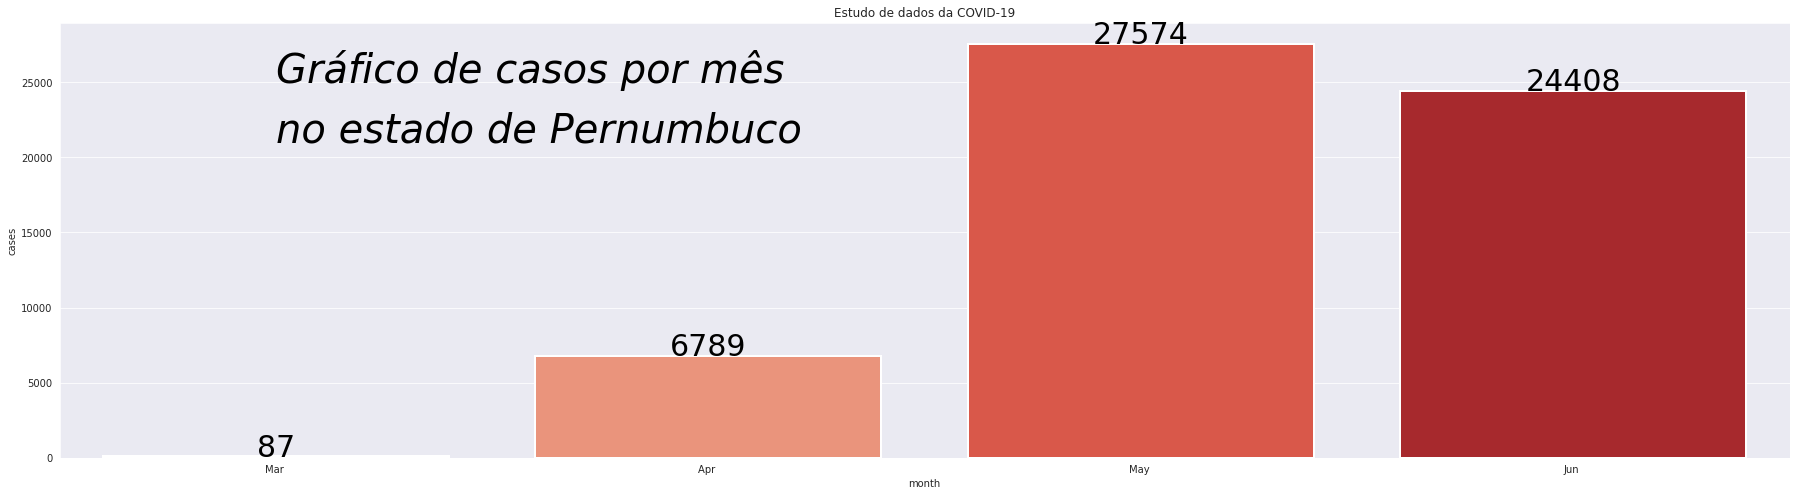

In [18]:
df = pd.DataFrame(data)
display(df)

sns.set_style('darkgrid')
plt.figure(figsize=(31,8))
g = sns.barplot(x="month", y="cases", data=df,palette="Reds",linewidth=2);
plt.title('Estudo de dados da COVID-19') 
plt.text(0,25000, "Gráfico de casos por mês", fontsize = 40, color='Black', fontstyle='italic')
plt.text(0,21000, "no estado de Pernumbuco", fontsize = 40, color='Black', fontstyle='italic')

cont=0
for index, row in df.iterrows():
  g.text(cont,row.cases, row.cases, color='black', ha="center",fontsize=30)
  cont = cont+1

g.figure.savefig('files/casos_por_mes.png',dpi=200,bbox_inches='tight',orientation='landscape',quality=90)
#g.figure.savefig('files/casos_por_mes.pdf',dpi=600,bbox_inches='tight',orientation='landscape',quality=90)


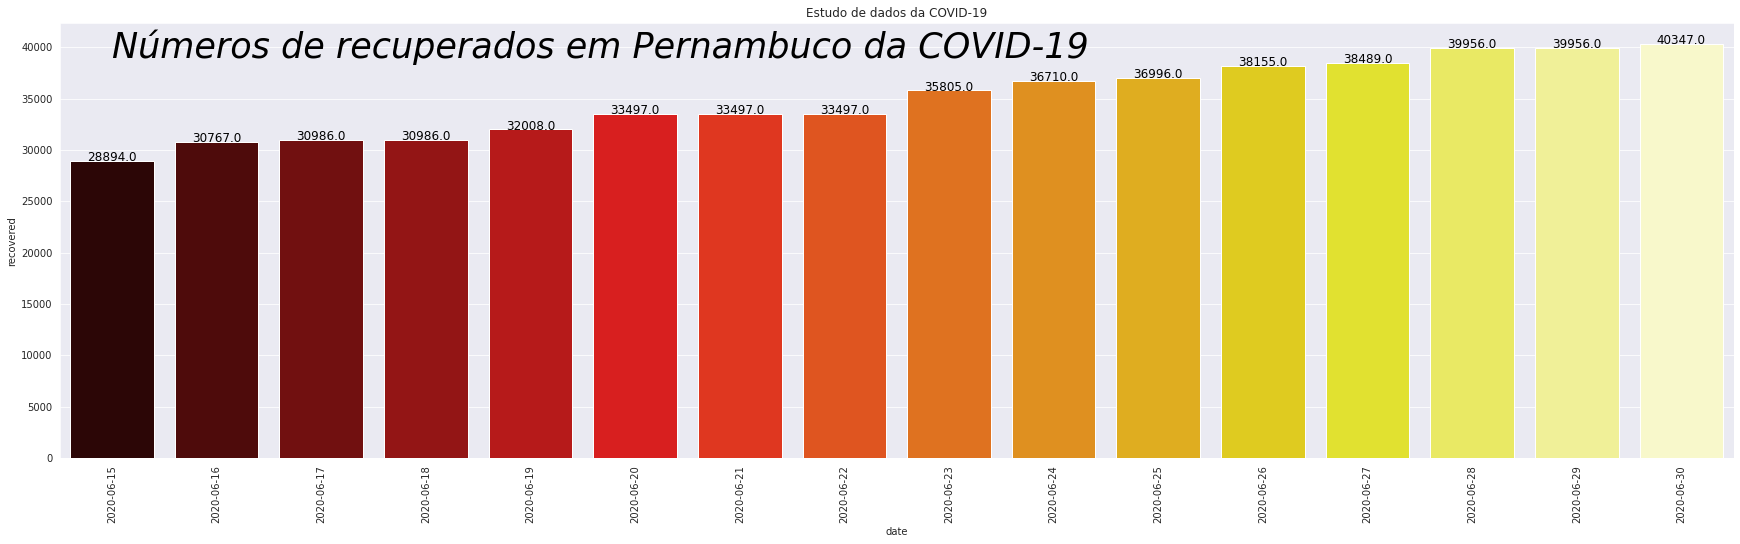

In [16]:
#df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
#display(df_municipio.tail())

df_estado = pd.read_csv('cases-brazil-states.csv')
#display(df_estado.tail())

df_paulista = df_estado[ ['date','state','recovered']]

# Selecionando estado e datas
df_paulista_recovered = df_paulista.loc[ (df_paulista["state"]=="PE") & (df_paulista["date"] >= "2020-06-15") & (df_paulista["date"] <= "2020-06-31") ]
#print(df_paulista_recovered.tail() )
sns.set_style('darkgrid')
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
g = sns.barplot(x="date", y="recovered",palette = 'hot',data=df_paulista_recovered)
g.text(0,39000, "Números de recuperados em Pernambuco da COVID-19", fontsize = 35, color='Black', fontstyle='italic')
plt.title('Estudo de dados da COVID-19') 

cont=0
for index, row in df_paulista_recovered.iterrows():
  g.text(cont,row.recovered, row.recovered, color='black', ha="center",fontsize=12)
  cont = cont+1


g.figure.savefig('files/recuperados_pernambuco.png',dpi=200,quality=90)


Download file basegeral.csv


,dt_notificacao,Sexo,municipio,dt_primeiros_sintomas,sintomas,comorbidades,hospitalizacao,classe,Resultado,evolucao,dt_obito,cd_municipio,faixa_etaria,tipo
122462,2020-05-23,MASCULINO,-,2020-05-11,OUTROS,NaN,NaN,DESCARTADO,NEGATIVO,RECUPERADO,NaN,-,20-29 anos,leve
122463,2020-06-15,FEMININO,-,2020-06-05,FEBRE TOSSE OUTROS,DIABETES,NaN,DESCARTADO,NEGATIVO,NaN,NaN,-,40-49 anos,leve
122464,2020-06-29,FEMININO,-,2020-06-25,DISPNEIA,DIABETES DOENCAS CARDIACAS CRONICAS,NaN,DESCARTADO,NEGATIVO,NaN,NaN,-,40-49 anos,leve
122465,2020-05-23,MASCULINO,-,2020-05-11,DOR DE GARGANTA OUTROS,NaN,NaN,DESCARTADO,NEGATIVO,RECUPERADO,NaN,-,20-29 anos,leve
122466,2020-05-28,MASCULINO,-,2020-05-19,FEBRE TOSSE DISPNEIA OUTROS,IMUNOSSUPRESSAO,NaN,DESCARTADO,NEGATIVO,RECUPERADO,NaN,-,40-49 anos,leve


,Sexo,Resultado,evolucao,faixa_etaria
122462,MASCULINO,NEGATIVO,RECUPERADO,20-29 anos
122463,FEMININO,NEGATIVO,NaN,40-49 anos
122464,FEMININO,NEGATIVO,NaN,40-49 anos
122465,MASCULINO,NEGATIVO,RECUPERADO,20-29 anos
122466,MASCULINO,NEGATIVO,RECUPERADO,40-49 anos


0               ISOLAMENTO DOMICILIAR
2                                 NaN
10                              OBITO
12      INTERNADO LEITO DE ISOLAMENTO
504                     INTERNADO UTI
1533                       RECUPERADO
Name: evolucao, dtype: object

0         FEMININO
5        MASCULINO
8217      Feminino
8230     Masculino
25705     Ignorado
Name: Sexo, dtype: object

0      20-29 anos
1      40-49 anos
2      30-39 anos
4      60-69 anos
7      50-59 anos
13            NaN
27     70-79 anos
66       80+ anos
133    10-19 anos
237      0-9 anos
Name: faixa_etaria, dtype: object

0                             AGUARDANDO RESULTADO
2                                              NaN
853       NEGATIVO INFLUENZA/AGUARDANDO SARS-COV-2
891                             NEGATIVO INFLUENZA
984            INFLUENZA A/INCONCLUSIVO SARS-COV-2
                            ...                   
109002              DETECTAVEL / INCONCLUSIVO / --
109937                    POSITIVO - REAGENTE / --
114556      NAO DETECTAVEL / NEGATIVO-NAO REAGENTE
115252            DETECTAVEL / POSITIVO - REAGENTE
120327         DETECTAVEL INFLUENZA B / DETECTAVEL
Name: Resultado, Length: 106, dtype: object

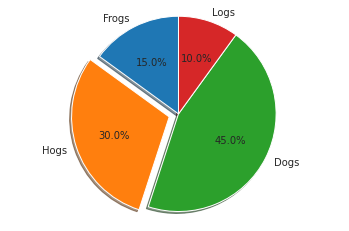

In [23]:
download('https://dados.seplag.pe.gov.br/apps/basegeral.csv','basegeral.csv')
df_basegeral = pd.read_csv('basegeral.csv',sep=';')
display(df_basegeral.tail())
df_basegeral = df_basegeral[ ['Sexo','Resultado','evolucao','faixa_etaria']]
display(df_basegeral.tail())

display(df_basegeral['evolucao'].drop_duplicates())
display(df_basegeral['Sexo'].drop_duplicates())
display(df_basegeral['faixa_etaria'].drop_duplicates())
display(df_basegeral['Resultado'].drop_duplicates())




#ax = sns.barplot(x="Resultado", y="faixa_etaria", hue="Sexo", data=df_basegeral)

import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


